In [2]:
import numpy as np

def step_function(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0, 1.0, 2.0])
print(x)
print(step_function(x))

[-1.  1.  2.]
[0 1 1]


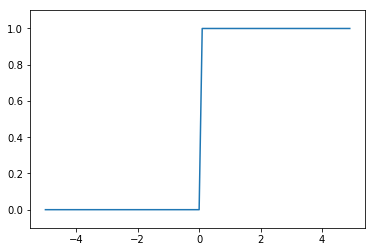

In [3]:
import matplotlib.pyplot as plt

# 계단함수
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y 축의 범위 지정
plt.show()

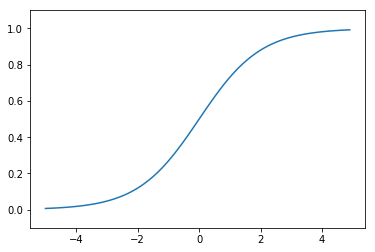

In [4]:
# 시그모이드 함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

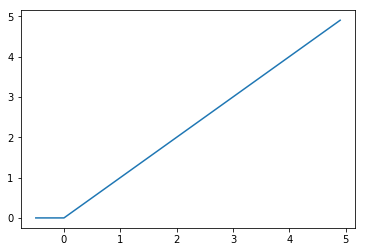

In [5]:
# ReLU 함수 ( Rectified Linear Unit )
def relu(x):
    return np.maximum(0, x)

x = np.arange(-0.5, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.show()

In [6]:
# numpy 다차원배열
A = np.array([[5, 4, 6], [7, 9, 8]])
B = np.array([[1, 2], [3, 4], [5, 9]])
print(B)
print(np.ndim(B))
print(B.shape)

np.dot(A, B)


[[1 2]
 [3 4]
 [5 9]]
2
(3, 2)


array([[ 47,  80],
       [ 74, 122]])

In [7]:
# 신경망의 내적
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


In [8]:
# 3.4.3 구현정리 (3층 신경망 구현하기)

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = a3

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[ 0.31682708  0.69627909]


In [9]:
# 3.5.1 항등 함수와 소프트맥스 함수 구현하기

a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

# 3.5.2 개선된 소프트맥스 함수 (오버플로를 막기 위해)
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

sm = softmax(np.array([1010, 1000, 990]))
print(np.sum(sm)) # 소프트맥스 함수의 합은 1이다

# 소프트맥스 함수를 이용함으로서 문제를 확률적으로 대응할수 있다

[  1.34985881  18.17414537  54.59815003]
74.1221542102
[ 0.01821127  0.24519181  0.73659691]
1.0
